# Analysis of the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-poster')

## Covid-19 information about the baltics
from https://stratcomcoe.org/cuploads/pfiles/Nato-Covid19-Nordic-Baltic-d6933.pdf and wikipedia

### Estonia

* First case - 26th of February 2020
* First death due to COVID-19 - 25th of March 2020
* First state of emergency declared - 12th of March 2020
* First state of emergency ended, but most restrictions continued to imply - 17th of May 2020
* Travel restrictions imposed - 17th of March 2020
* Stronger restrictions imposed again - 11th of March 2021
* Peak of COVID-19 infections March 2021
* 2+2 rule imposed - 25th of March 2020


### Latvia

* First case - 2nd of March 2020
* First death - 3rd of April 2020
* First state of emergency declared - 12th of March 2020
* First state of emergency ended - 10th of June 2020
* Second state of emergency declared - 9th november 2020
* Second state of emergency ended - 6th of April 2021
* Travel restrictions imposed - 17th of March 2020

### Lithuania

* First case - 24th of february 2020
* First death - 21st of March 2020
* First state of emergency declared - 26th of February 2020
* First state of emergency ended - 17th of June 2020
* National lockdown declared - 4th of November 2020
* National lockdown ended - 1st of July 2021
* Travel restrictions imposed - 16th of March 2020

## Correlation between energy consumption and GDP

### Estonia

In [3]:
energy_et = pd.read_csv("df_energy_consumption_et.csv")

# Convert 'Period' column to datetime type
energy_et['Period'] = pd.to_datetime(energy_et['Period'])
# Extract year and month information
energy_et['Year'] = energy_et['Period'].dt.year
energy_et['Month'] = energy_et['Period'].dt.month

mean_et = energy_et.groupby(['Year', 'Month'])['Consumption'].mean()
mean_et_flat = mean_et.reset_index()
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month']].assign(DAY=1))

gdp_et = pd.read_csv("df_gdp_et.csv")

In [4]:
mean_quarter_et = pd.DataFrame(columns=['date', 'consumption'])
zum = 0

for index, row in mean_et_flat.iterrows():
    zum += float(row["Consumption"])

    if (index + 1) % 3 == 0:
        year_str = str(int(row["Year"]))  # Convert year to string
        month_str = str(int(row["Month"])-2)  # Convert month to string
        quarter_date = pd.to_datetime(year_str + "-" + month_str + "-01")
        quarter_consumption = float(zum) / 3

        mean_quarter_et = pd.concat([mean_quarter_et, pd.DataFrame([[quarter_date, quarter_consumption]], columns=['date', 'consumption'])], ignore_index=True)
        zum = 0

C:\Users\artur\AppData\Local\Temp\ipykernel_10796\3619288027.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_quarter_et = pd.concat([mean_quarter_et, pd.DataFrame([[quarter_date, quarter_consumption]], columns=['date', 'consumption'])], ignore_index=True)


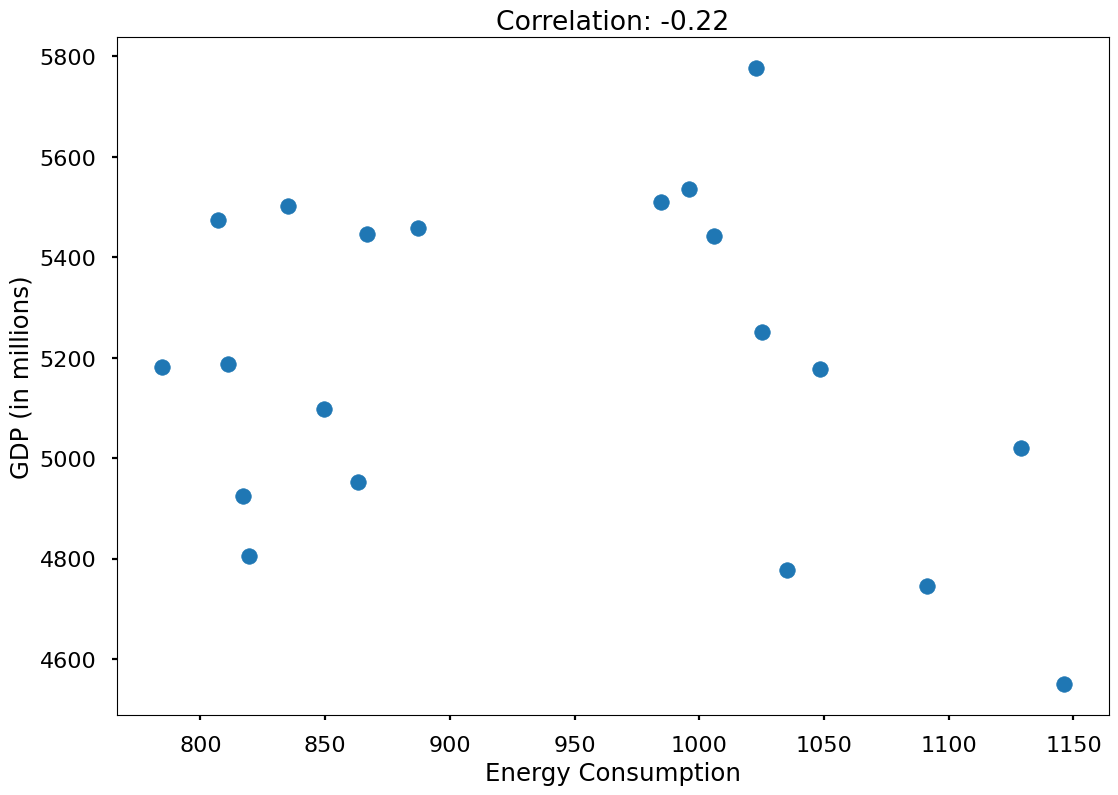

Correlation between GDP and Energy Consumption: -0.22


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index of the energy consumption data
mean_quarter_et = mean_quarter_et.reset_index(drop=True)

# Convert "date" column in both datasets to datetime format
gdp_et['date'] = pd.to_datetime(gdp_et['date'])
mean_quarter_et['date'] = pd.to_datetime(mean_quarter_et['date'])

# Merge the two datasets
merged_data = pd.merge(mean_quarter_et, gdp_et, on='date', how='inner')

# Calculate the correlation
correlation = merged_data['consumption'].corr(merged_data['million'])

# Plotting
plt.scatter(merged_data['consumption'], merged_data['million'])
plt.xlabel('Energy Consumption')
plt.ylabel('GDP (in millions)')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between GDP and Energy Consumption: {correlation:.2f}')

A correlation coefficient of -0.22 indicates a weak negative correlation between the two variables. The negative sign indicates an inverse relationship: as one variable increases, the other tends to decrease, and vice versa.

The magnitude of the correlation coefficient -0.22 suggests a relatively weak relationship.

A correlation of -0.22 suggests a tendency for energy consumption to decrease slightly as GDP increases, but the relationship is not strong. It's important to note that correlation does not imply causation, and other factors may influence the observed relationship between energy consumption and GDP.

### Latvia

In [6]:
energy_lv = pd.read_csv("df_energy_consumption_lv.csv")

# Convert 'Period' column to datetime type
energy_lv['Period'] = pd.to_datetime(energy_lv['Period'])
# Extract year and month information
energy_lv['Year'] = energy_lv['Period'].dt.year
energy_lv['Month'] = energy_lv['Period'].dt.month

mean_lv= energy_lv.groupby(['Year', 'Month'])['Consumption'].mean()
mean_lv_flat = mean_lv.reset_index()
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month']].assign(DAY=1))

gdp_lv = pd.read_csv("df_gdp_lv.csv")

In [7]:
mean_quarter_lv = pd.DataFrame(columns=['date', 'consumption'])
zum = 0

for index, row in mean_lv_flat.iterrows():
    zum += float(row["Consumption"])

    if (index + 1) % 3 == 0:
        year_str = str(int(row["Year"]))  # Convert year to string
        month_str = str(int(row["Month"])-2)  # Convert month to string
        quarter_date = pd.to_datetime(year_str + "-" + month_str + "-01")
        quarter_consumption = float(zum) / 3

        mean_quarter_lv = pd.concat([mean_quarter_lv, pd.DataFrame([[quarter_date, quarter_consumption]], columns=['date', 'consumption'])], ignore_index=True)
        zum = 0

C:\Users\artur\AppData\Local\Temp\ipykernel_10796\3419042877.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_quarter_lv = pd.concat([mean_quarter_lv, pd.DataFrame([[quarter_date, quarter_consumption]], columns=['date', 'consumption'])], ignore_index=True)


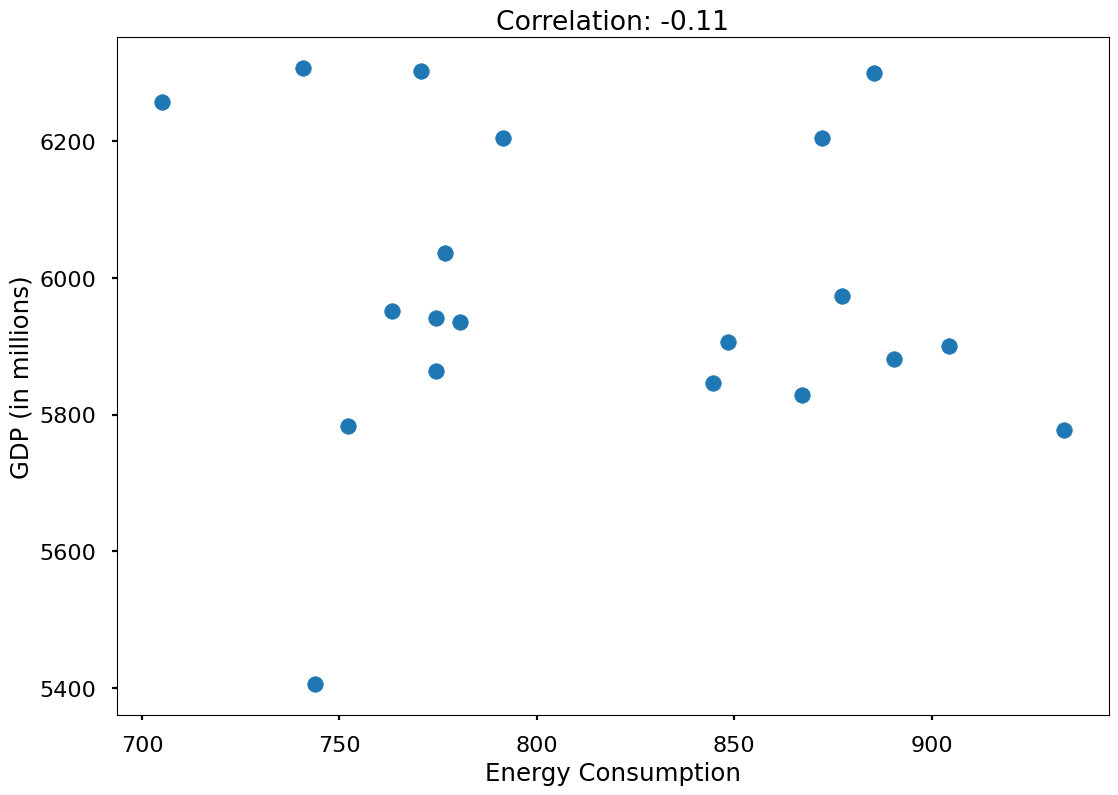

Correlation between GDP and Energy Consumption: -0.11


In [8]:
# Reset the index of the energy consumption data
mean_quarter_lv = mean_quarter_lv.reset_index(drop=True)

# Convert "date" column in both datasets to datetime format
gdp_lv['date'] = pd.to_datetime(gdp_lv['date'])
mean_quarter_lv['date'] = pd.to_datetime(mean_quarter_lv['date'])

# Merge the two datasets
merged_data = pd.merge(mean_quarter_lv, gdp_lv, on='date', how='inner')

# Calculate the correlation
correlation = merged_data['consumption'].corr(merged_data['million'])

# Plotting
plt.scatter(merged_data['consumption'], merged_data['million'])
plt.xlabel('Energy Consumption')
plt.ylabel('GDP (in millions)')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between GDP and Energy Consumption: {correlation:.2f}')

A correlation coefficient of -0.11 indicates a weak negative correlation between GDP and energy consumption in Latvia. Relationship is not very strong. 

A correlation of -0.11 indicates a slight tendency for GDP to increase as the energy consumption decreases, but the relationship is weak. It's important to note that correlation does not imply causation, and the observed correlation might be influenced by various factors.

### Lithuania

In [9]:
energy_lt = pd.read_csv("df_energy_consumption_lt.csv")

# Convert 'Period' column to datetime type
energy_lt['Period'] = pd.to_datetime(energy_lt['Period'])
# Extract year and month information
energy_lt['Year'] = energy_lt['Period'].dt.year
energy_lt['Month'] = energy_lt['Period'].dt.month

mean_lt= energy_lt.groupby(['Year', 'Month'])['Consumption'].mean()
mean_lt_flat = mean_lt.reset_index()
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month']].assign(DAY=1))

gdp_lt = pd.read_csv("df_gdp_lt.csv")

In [10]:
mean_quarter_lt = pd.DataFrame(columns=['date', 'consumption'])
zum = 0

for index, row in mean_lt_flat.iterrows():
    zum += float(row["Consumption"])

    if (index + 1) % 3 == 0:
        year_str = str(int(row["Year"]))  # Convert year to string
        month_str = str(int(row["Month"])-2)  # Convert month to string
        quarter_date = pd.to_datetime(year_str + "-" + month_str + "-01")
        quarter_consumption = float(zum) / 3

        mean_quarter_lt = pd.concat([mean_quarter_lt, pd.DataFrame([[quarter_date, quarter_consumption]], columns=['date', 'consumption'])], ignore_index=True)
        zum = 0

C:\Users\artur\AppData\Local\Temp\ipykernel_10796\4093141374.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_quarter_lt = pd.concat([mean_quarter_lt, pd.DataFrame([[quarter_date, quarter_consumption]], columns=['date', 'consumption'])], ignore_index=True)


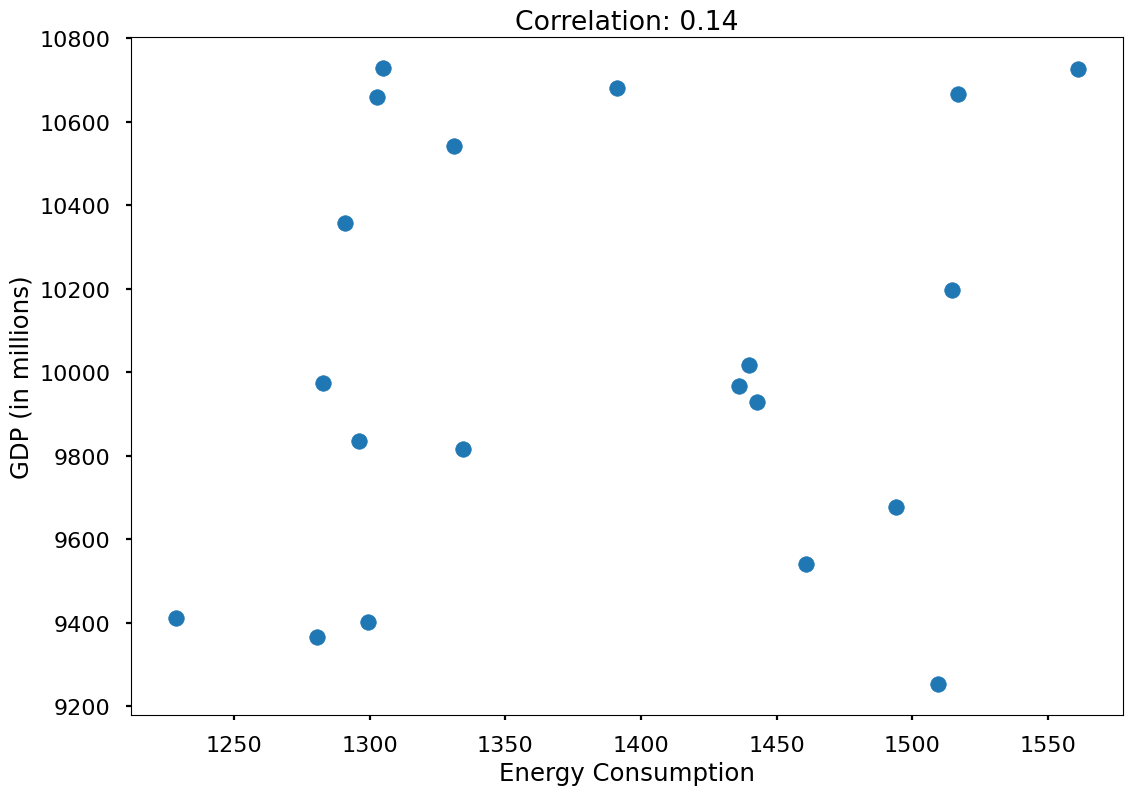

Correlation between GDP and Energy Consumption: 0.14


In [11]:
# Reset the index of the energy consumption data
mean_quarter_lt = mean_quarter_lt.reset_index(drop=True)

# Convert "date" column in both datasets to datetime format
gdp_lt['date'] = pd.to_datetime(gdp_lt['date'])
mean_quarter_lt['date'] = pd.to_datetime(mean_quarter_lt['date'])

# Merge the two datasets
merged_data = pd.merge(mean_quarter_lt, gdp_lt, on='date', how='inner')

# Calculate the correlation
correlation = merged_data['consumption'].corr(merged_data['million'])

# Plotting
plt.scatter(merged_data['consumption'], merged_data['million'])
plt.xlabel('Energy Consumption')
plt.ylabel('GDP (in millions)')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between GDP and Energy Consumption: {correlation:.2f}')

A correlation coefficient of 0.14 indicates a weak positive correlation between GDP and energy consumption. Specifically, it suggests a tendency for the two variables to move in the same direction, but the relationship is not strong.

A correlation of 0.14 suggests a slight tendency for energy consumption to increase as GDP increases, but the relationship is weak. It's important to note that correlation does not imply causation, and the observed correlation might be influenced by various factors.

## Correlation between energy consumption and temperature

### Estonia

In [12]:
energy_et = pd.read_csv("df_energy_consumption_et.csv")

# Convert 'Period' column to datetime type
energy_et['Period'] = pd.to_datetime(energy_et['Period'])
# Extract year, month and day information
energy_et['Year'] = energy_et['Period'].dt.year
energy_et['Month'] = energy_et['Period'].dt.month
energy_et['Day'] = energy_et['Period'].dt.day

mean_et = energy_et.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_et_flat = mean_et.reset_index()
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month', 'Day']].assign(DAY=1))

In [13]:
temp_et = pd.read_csv("df_temp_et.csv")
# Convert 'date' column to datetime type
temp_et['date'] = pd.to_datetime(temp_et['date'])

# Extract year, month and day information
temp_et['Year'] = temp_et['date'].dt.year
temp_et['Month'] = temp_et['date'].dt.month
temp_et['Day'] = temp_et['date'].dt.day

mean_temp_et = temp_et.groupby(['Year', 'Month', 'Day'])['temp'].mean()
mean_temp_et_flat = mean_temp_et.reset_index()
mean_temp_et_flat['Date'] = pd.to_datetime(mean_temp_et_flat[['Year', 'Month', 'Day']].assign(DAY=1))

In [14]:
# Remove 'Year', 'Month', 'Day' columns from datasets and convert them to pandas datetime in "Date" column
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month', 'Day']])
mean_et_flat = mean_et_flat.drop(['Year', 'Month', 'Day'], axis=1)

mean_temp_et_flat['Date'] = pd.to_datetime(mean_temp_et_flat[['Year', 'Month', 'Day']])
mean_temp_et_flat = mean_temp_et_flat.drop(['Year', 'Month', 'Day'], axis=1)

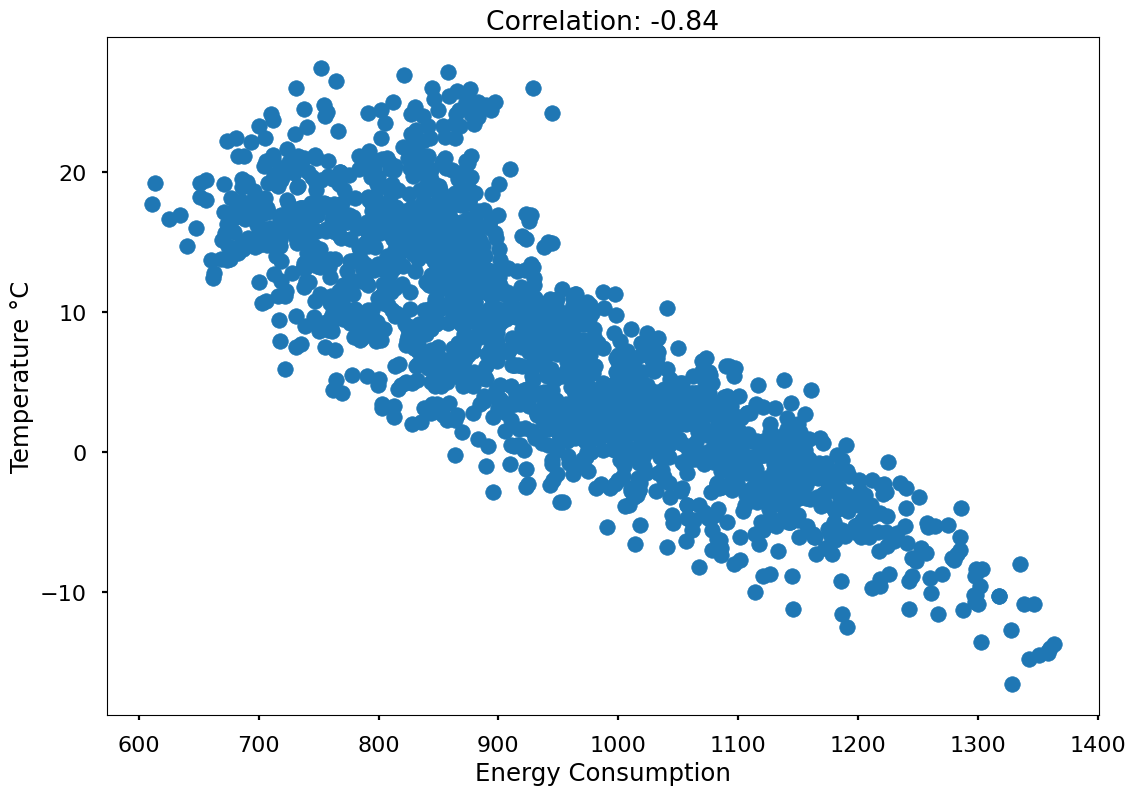

Correlation between temperature and energy consumption: -0.84


In [15]:
# Merge the two datasets
merged_data = pd.merge(mean_et_flat, mean_temp_et_flat, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['temp'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['temp'])
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature °C')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between temperature and energy consumption: {correlation:.2f}')

A correlation coefficient of -0.84 between temperature and energy consumption suggests a strong negative linear relationship. This means that as temperature increases, energy consumption tends to decrease, and vice versa. The magnitude of -0.84 indicates a relatively high strength of this negative correlation.

It's important to note that correlation does not imply causation. Even though there is a correlation, it doesn't necessarily mean that changes in temperature directly cause changes in energy consumption or vice versa. Other factors may influence both variables or there could be more complex relationships at play.

## Latvia

In [16]:
energy_lv = pd.read_csv("df_energy_consumption_lv.csv")

# Convert 'Period' column to datetime type
energy_lv['Period'] = pd.to_datetime(energy_lv['Period'])
# Extract year, month, and day information
energy_lv['Year'] = energy_lv['Period'].dt.year
energy_lv['Month'] = energy_lv['Period'].dt.month
energy_lv['Day'] = energy_lv['Period'].dt.day

mean_lv = energy_lv.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_lv_flat = mean_lv.reset_index()
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month', 'Day']].assign(DAY=1))

In [17]:
temp_lv = pd.read_csv("df_temp_lv.csv")
# Convert 'date' column to datetime type
temp_lv['date'] = pd.to_datetime(temp_lv['date'])

# Extract year, month, and day information
temp_lv['Year'] = temp_lv['date'].dt.year
temp_lv['Month'] = temp_lv['date'].dt.month
temp_lv['Day'] = temp_lv['date'].dt.day

mean_temp_lv = temp_lv.groupby(['Year', 'Month', 'Day'])['temp'].mean()
mean_temp_lv_flat = mean_temp_lv.reset_index()
mean_temp_lv_flat['Date'] = pd.to_datetime(mean_temp_lv_flat[['Year', 'Month', 'Day']].assign(DAY=1))

In [18]:
# Remove 'Year', 'Month', 'Day' columns from datasets and convert them to pandas datetime in "Date" column
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month', 'Day']])
mean_lv_flat = mean_lv_flat.drop(['Year', 'Month', 'Day'], axis=1)

mean_temp_lv_flat['Date'] = pd.to_datetime(mean_temp_lv_flat[['Year', 'Month', 'Day']])
mean_temp_lv_flat = mean_temp_lv_flat.drop(['Year', 'Month', 'Day'], axis=1)


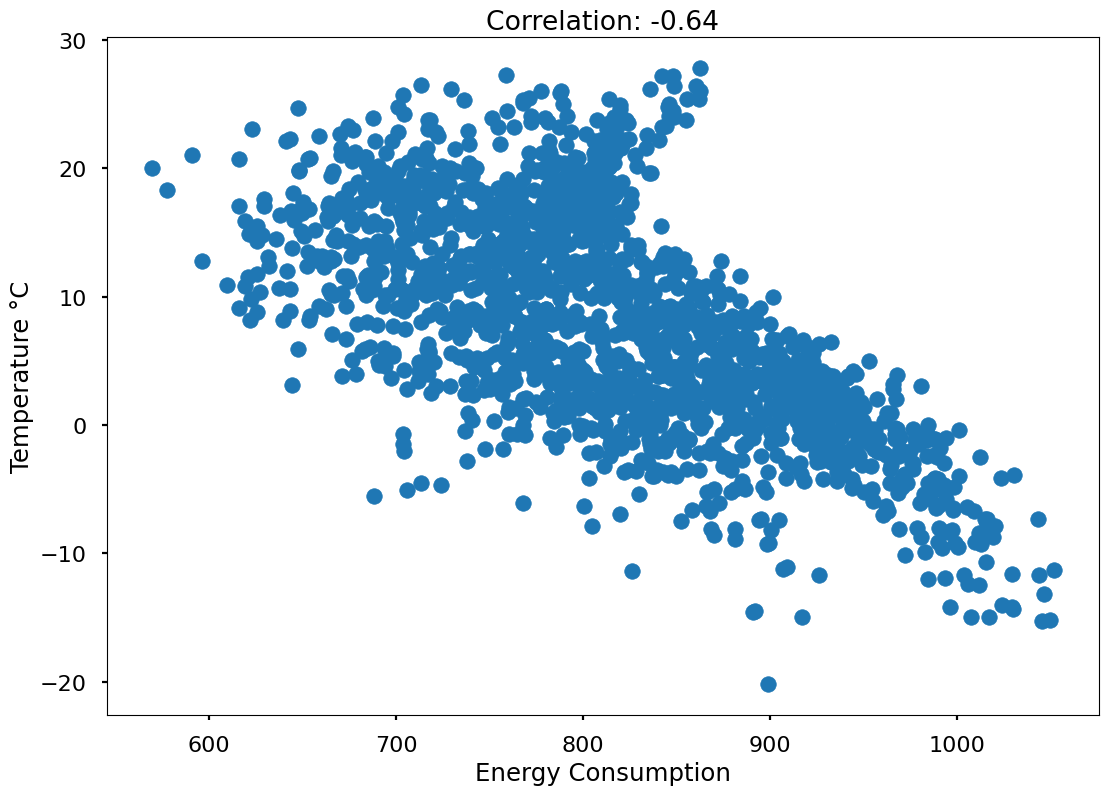

Correlation between temperature and energy consumption: -0.64


In [19]:
# Merge the two datasets
merged_data = pd.merge(mean_lv_flat, mean_temp_lv_flat, on='Date', how='inner')
# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['temp'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['temp'])
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature °C')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between temperature and energy consumption: {correlation:.2f}')

A correlation of -0.64 suggests that there is a tendency for energy consumption to decrease as temperature increases, and vice versa. That correlation does not imply causation, and there could be other factors influencing the relationship. Additionally, the strength of the relationship is moderate, not extremely strong.

## Lithuania

In [20]:
energy_lt = pd.read_csv("df_energy_consumption_lt.csv")

# Convert 'Period' column to datetime type
energy_lt['Period'] = pd.to_datetime(energy_lt['Period'])
# Extract year, month and day information
energy_lt['Year'] = energy_lt['Period'].dt.year
energy_lt['Month'] = energy_lt['Period'].dt.month
energy_lt['Day'] = energy_lt['Period'].dt.day

mean_lt = energy_lt.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_lt_flat = mean_lt.reset_index()
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month', 'Day']].assign(DAY=1))

In [21]:
temp_lt = pd.read_csv("df_temp_lt.csv")
# Convert 'date' column to datetime type
temp_lt['date'] = pd.to_datetime(temp_lt['date'])

# Extract year, month and day information
temp_lt['Year'] = temp_lt['date'].dt.year
temp_lt['Month'] = temp_lt['date'].dt.month
temp_lt['Day'] = temp_lt['date'].dt.day

mean_temp_lt = temp_lt.groupby(['Year', 'Month', 'Day'])['temp'].mean()
mean_temp_lt_flat = mean_temp_lt.reset_index()
mean_temp_lt_flat['Date'] = pd.to_datetime(mean_temp_lt_flat[['Year', 'Month', 'Day']].assign(DAY=1))

In [22]:
# Remove 'Year', 'Month', 'Day' columns from datasets and convert them to pandas datetime in "Date" column
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month', 'Day']])
mean_lt_flat = mean_lt_flat.drop(['Year', 'Month', 'Day'], axis=1)

mean_temp_lt_flat['Date'] = pd.to_datetime(mean_temp_lt_flat[['Year', 'Month', 'Day']])
mean_temp_lt_flat = mean_temp_lt_flat.drop(['Year', 'Month', 'Day'], axis=1)

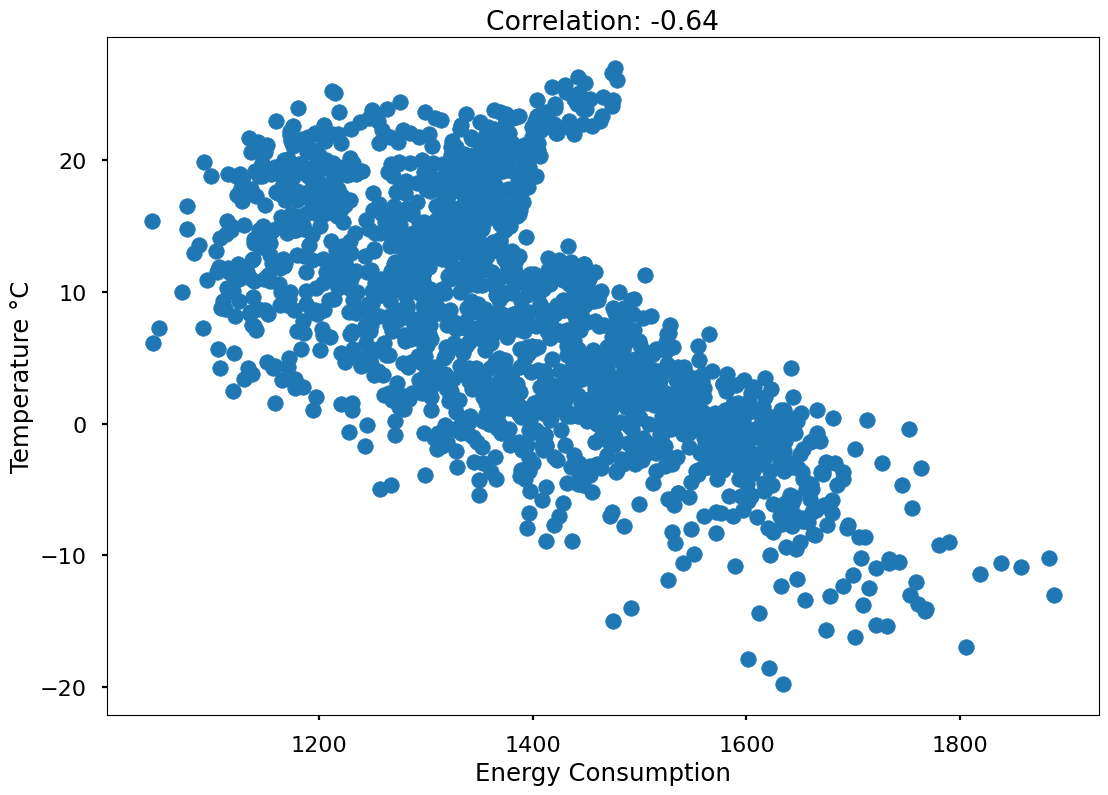

Correlation between temperature and energy consumption: -0.64


In [23]:
# Merge the two datasets
merged_data = pd.merge(mean_lt_flat, mean_temp_lt_flat, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['temp'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['temp'])
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature °C')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between temperature and energy consumption: {correlation:.2f}')

A correlation of -0.64 suggests that there is a tendency for energy consumption to decrease as temperature increases, and vice versa. That correlation does not imply causation, and there could be other factors influencing the relationship. Additionally, the strength of the relationship is moderate, not extremely strong.

## Correlation between energy consumption and number of COVID-19 deaths

Our hypotheses was that there exists a correlation between the two factors, because we assumed that a lot of people would be hospitalized before death. We thought energy consumption would increase siginificantly due to electricity reliant hospital equipment. On the other hand, we also figured that the less people there are, the less energy would be consumed.

In [24]:
deaths_df = pd.read_csv("df_covid_deaths.csv")
deaths_df

,date,et,lt,lv
0,2020-01-03,0,0,0
1,2020-01-04,0,0,0
2,2020-01-05,0,0,0
3,2020-01-06,0,0,0
4,2020-01-07,0,0,0
...,...,...,...,...
1089,2022-12-27,2727,9474,7011
1090,2022-12-28,2727,9475,7011
1091,2022-12-29,2727,9478,7011
1092,2022-12-30,2727,9479,7011


We cut out the rows where the death toll was 0 in all countries and the rows where number of deaths did not change anymore.

In [25]:
deaths_df = deaths_df[(deaths_df["et"]>0) | (deaths_df["lt"]>0) | (deaths_df["lv"]>0)]
deaths_df = deaths_df[(deaths_df["et"]<=2727) & (deaths_df["lt"]<=9474) & (deaths_df["lv"]<=7011)]
deaths_df

,date,et,lt,lv
81,2020-03-24,0,1,0
82,2020-03-25,0,2,0
83,2020-03-26,0,3,0
84,2020-03-27,0,4,0
85,2020-03-28,0,4,0
...,...,...,...,...
1085,2022-12-23,2710,9468,6971
1086,2022-12-24,2710,9469,6971
1087,2022-12-25,2727,9469,7011
1088,2022-12-26,2727,9472,7011


In [26]:
# Convert "date" column to pandas datetime
deaths_df['date'] = pd.to_datetime(deaths_df['date'])

# Determine the start and end dates
start_date = deaths_df['date'].min()
end_date = deaths_df['date'].max()

print(f'Start Date: {start_date}')
print(f'End Date: {end_date}')

Start Date: 2020-03-24 00:00:00
End Date: 2022-12-27 00:00:00


In [27]:
# Rename "date" to "Date"
deaths_df.rename(columns={'date': 'Date'}, inplace=True)

### Estonia

In [28]:
energy_et = pd.read_csv("df_energy_consumption_et.csv")

# Convert 'Period' column to datetime type
energy_et['Period'] = pd.to_datetime(energy_et['Period'])
# Extract year, month and day information
energy_et['Year'] = energy_et['Period'].dt.year
energy_et['Month'] = energy_et['Period'].dt.month
energy_et['Day'] = energy_et['Period'].dt.day

mean_et = energy_et.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_et_flat = mean_et.reset_index()
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month', 'Day']].assign(DAY=1))

# Remove 'Year', 'Month', 'Day' columns from mean_et_flat dataset and convert them to pandas datetime in "Date" column
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month', 'Day']])
mean_et_flat = mean_et_flat.drop(['Year', 'Month', 'Day'], axis=1)

In [29]:
# Keep rows where date is between start_date and end_date
mean_et_flat = mean_et_flat[(mean_et_flat['Date'] >= start_date) & (mean_et_flat['Date'] <= end_date)]
# Reset the index
mean_et_flat = mean_et_flat.reset_index(drop=True)

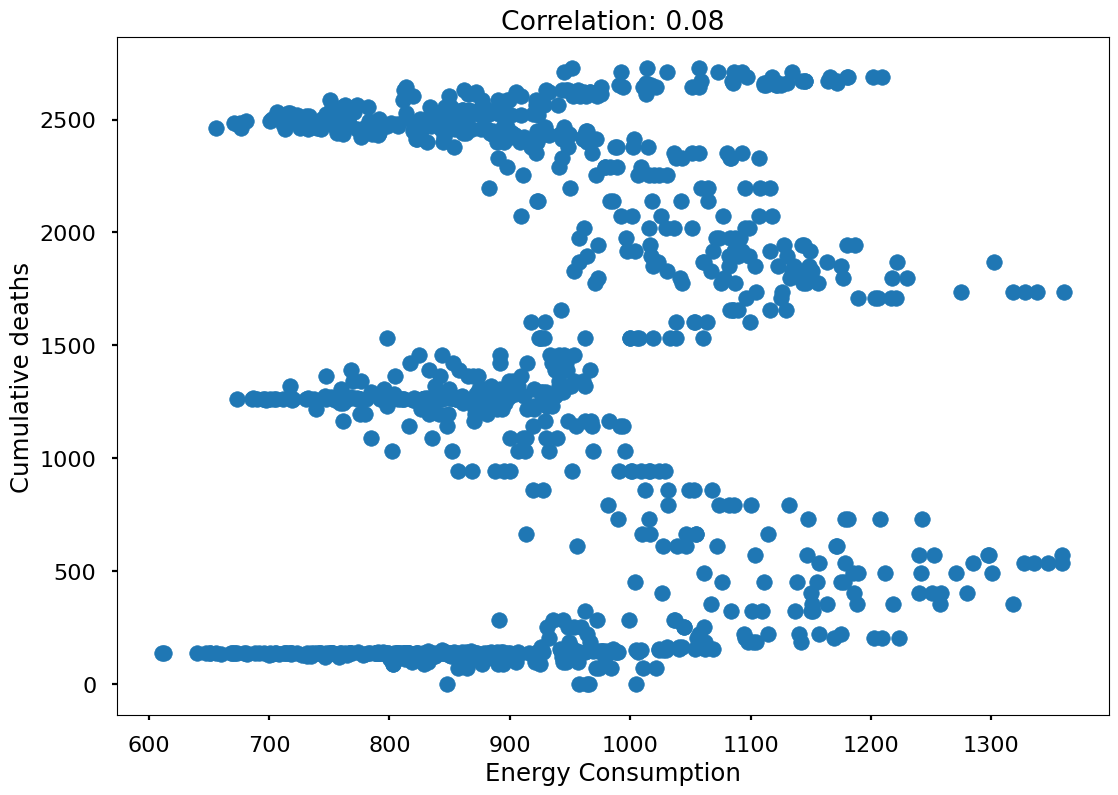

Correlation between cumulative deaths and energy consumption: 0.08


In [30]:
# Merge the two datasets
merged_data = pd.merge(mean_et_flat, deaths_df, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['et'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['et'])
plt.xlabel('Energy Consumption')
plt.ylabel('Cumulative deaths')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between cumulative deaths and energy consumption: {correlation:.2f}')

A correlation coefficient of 0.08 suggests a very weak positive correlation between cumulative deaths and energy consumption. A correlation of 0.08 is typically considered negligible, and it may not provide meaningful insights into the relationship between the number of cumulative deaths and the energy consumption in the given dataset.

### Latvia

In [31]:
energy_lv = pd.read_csv("df_energy_consumption_lv.csv")

# Convert 'Period' column to datetime type
energy_lv['Period'] = pd.to_datetime(energy_lv['Period'])
# Extract year, month and day information
energy_lv['Year'] = energy_lv['Period'].dt.year
energy_lv['Month'] = energy_lv['Period'].dt.month
energy_lv['Day'] = energy_lv['Period'].dt.day

mean_lv = energy_lv.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_lv_flat = mean_lv.reset_index()
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month', 'Day']].assign(DAY=1))

# Remove 'Year', 'Month', 'Day' columns from mean_lv_flat dataset and convert them to pandas datetime in "Date" column
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month', 'Day']])
mean_lv_flat = mean_lv_flat.drop(['Year', 'Month', 'Day'], axis=1)

In [32]:
# Keep rows where date is between start_date and end_date
mean_lv_flat = mean_lv_flat[(mean_lv_flat['Date'] >= start_date) & (mean_lv_flat['Date'] <= end_date)]
# Reset the index
mean_lv_flat = mean_lv_flat.reset_index(drop=True)

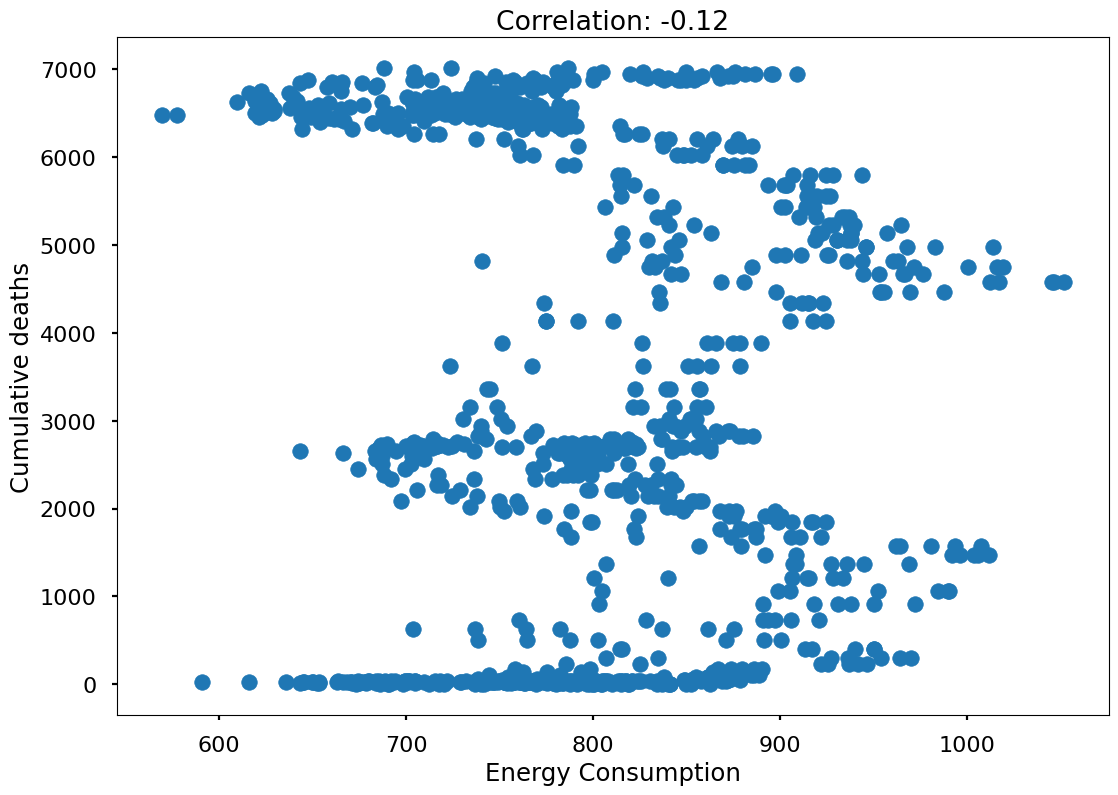

Correlation between cumulative deaths and energy consumption: -0.12


In [33]:
# Merge the two datasets
merged_data = pd.merge(mean_lv_flat, deaths_df, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['lv'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['lv'])
plt.xlabel('Energy Consumption')
plt.ylabel('Cumulative deaths')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between cumulative deaths and energy consumption: {correlation:.2f}')

A correlation coefficient of -0.12 indicates a very weak negative correlation between the number of cumulative deaths and energy consumption.

### Lithuania

In [34]:
energy_lt = pd.read_csv("df_energy_consumption_lt.csv")

# Convert 'Period' column to datetime type
energy_lt['Period'] = pd.to_datetime(energy_lt['Period'])
# Extract year, month and day information
energy_lt['Year'] = energy_lt['Period'].dt.year
energy_lt['Month'] = energy_lt['Period'].dt.month
energy_lt['Day'] = energy_lt['Period'].dt.day

mean_lt = energy_lt.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_lt_flat = mean_lt.reset_index()
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month', 'Day']].assign(DAY=1))

# Remove 'Year', 'Month', 'Day' columns from mean_lt_flat dataset and convert them to pandas datetime in "Date" column
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month', 'Day']])
mean_lt_flat = mean_lt_flat.drop(['Year', 'Month', 'Day'], axis=1)


In [35]:
# Keep rows where date is between start_date and end_date
mean_lt_flat = mean_lt_flat[(mean_lt_flat['Date'] >= start_date) & (mean_lt_flat['Date'] <= end_date)]
# Reset the index
mean_lt_flat = mean_lt_flat.reset_index(drop=True)

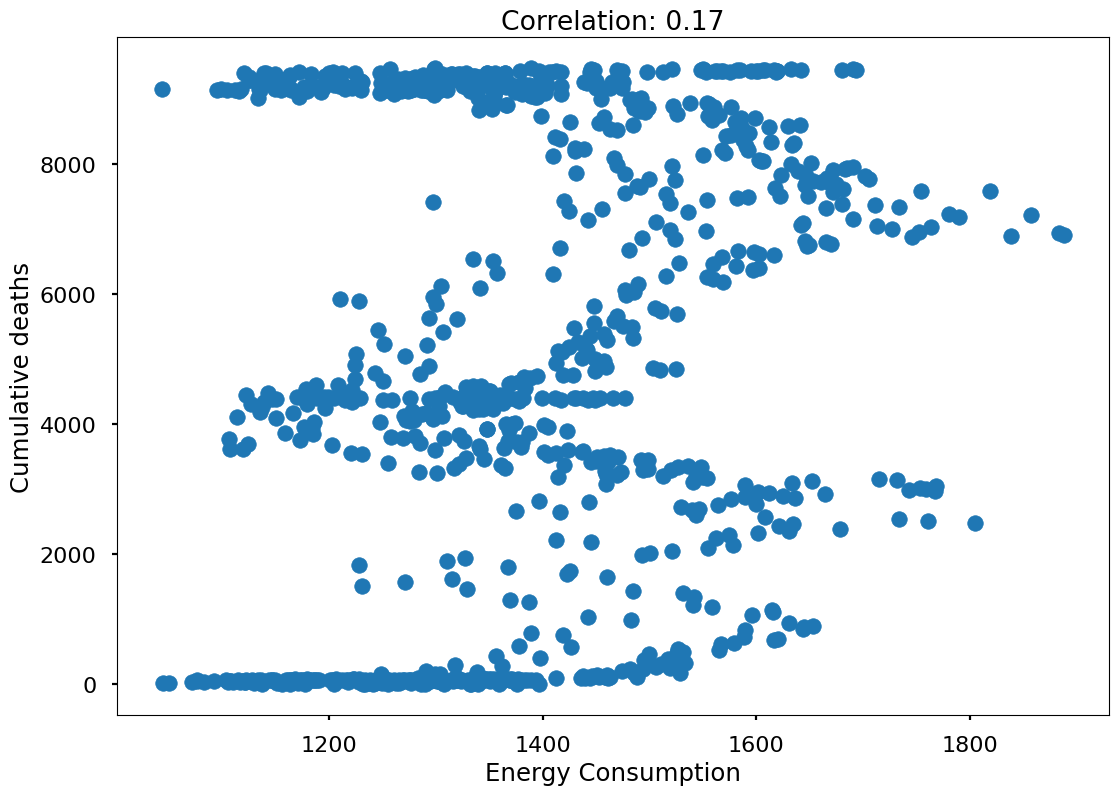

Correlation between cumulative deaths and energy consumption: 0.17


In [36]:
# Merge the two datasets
merged_data = pd.merge(mean_lt_flat, deaths_df, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['lt'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['lt'])
plt.xlabel('Energy Consumption')
plt.ylabel('Cumulative deaths')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between cumulative deaths and energy consumption: {correlation:.2f}')

A correlation coefficient of 0.17 suggests a very weak positive correlation between the number of cumulative deaths and energy consumption.

## Correlation between energy consumption and new COVID-19 cases reported to WHO

In [37]:
cases_et_df = pd.read_csv("df_WHO_et.csv")
cases_lv_df = pd.read_csv("df_WHO_lv.csv")
cases_lt_df = pd.read_csv("df_WHO_lt.csv")

# Convert Date_reported to pandas datetime
cases_lv_df["Date_reported"] = pd.to_datetime(cases_lv_df["Date_reported"])
cases_lt_df["Date_reported"] = pd.to_datetime(cases_lt_df["Date_reported"])
cases_et_df["Date_reported"] = pd.to_datetime(cases_et_df["Date_reported"])

# Rename "date" to "Date"
cases_lv_df.rename(columns={'Date_reported': 'Date'}, inplace=True)
cases_lt_df.rename(columns={'Date_reported': 'Date'}, inplace=True)
cases_et_df.rename(columns={'Date_reported': 'Date'}, inplace=True)

In [38]:
cases_et_df

,Date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Estonia,0,0,0,0
1,2020-01-04,Estonia,0,0,0,0
2,2020-01-05,Estonia,0,0,0,0
3,2020-01-06,Estonia,0,0,0,0
4,2020-01-07,Estonia,0,0,0,0
...,...,...,...,...,...,...
1089,2022-12-27,Estonia,0,594217,0,2727
1090,2022-12-28,Estonia,0,594217,0,2727
1091,2022-12-29,Estonia,0,594217,0,2727
1092,2022-12-30,Estonia,0,594217,0,2727


### Estonia

In [39]:
energy_et = pd.read_csv("df_energy_consumption_et.csv")

# Convert 'Period' column to datetime type
energy_et['Period'] = pd.to_datetime(energy_et['Period'])
# Extract year, month and day information
energy_et['Year'] = energy_et['Period'].dt.year
energy_et['Month'] = energy_et['Period'].dt.month
energy_et['Day'] = energy_et['Period'].dt.day

mean_et = energy_et.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_et_flat = mean_et.reset_index()
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month', 'Day']].assign(DAY=1))

# Remove 'Year', 'Month', 'Day' columns from mean_et_flat dataset and convert them to pandas datetime in "Date" column
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month', 'Day']])
mean_et_flat = mean_et_flat.drop(['Year', 'Month', 'Day'], axis=1)

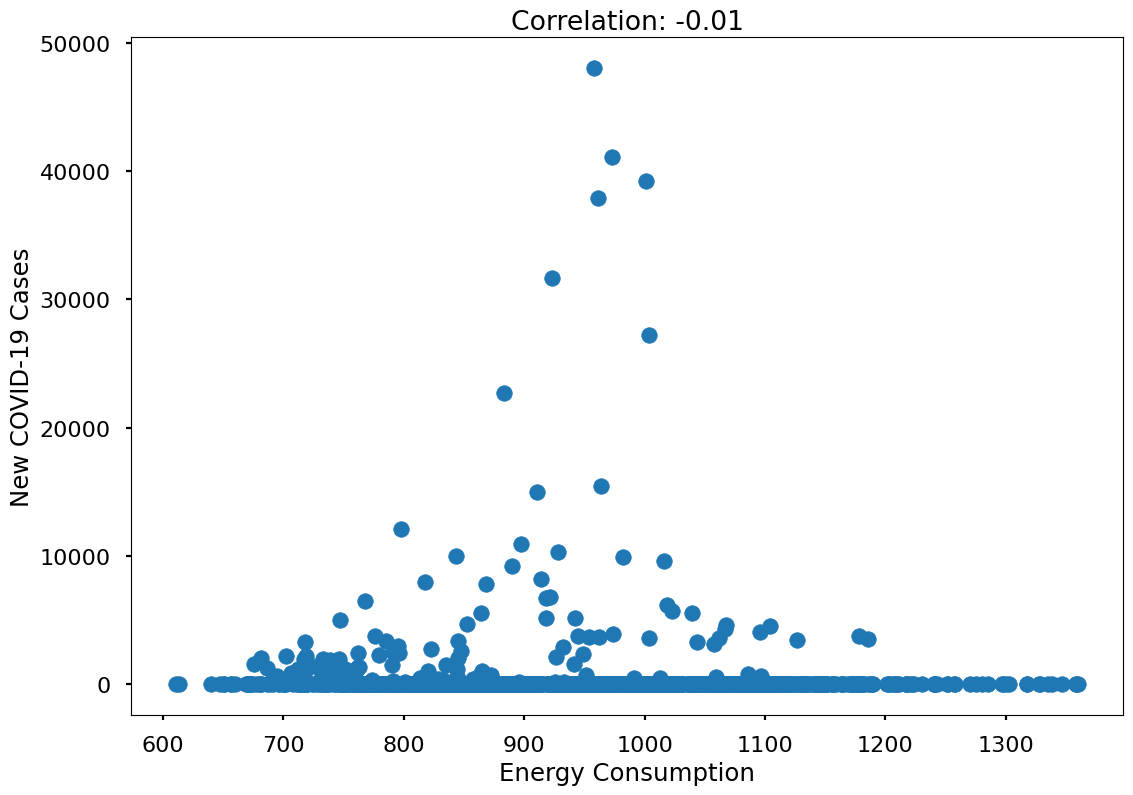

Correlation between new confirmed COVID-19 cases reported to WHO and energy consumption: -0.01


In [40]:
# Merge the two datasets
merged_data = pd.merge(mean_et_flat, cases_et_df, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['New_cases'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['New_cases'])
plt.xlabel('Energy Consumption')
plt.ylabel('New COVID-19 Cases')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between new confirmed COVID-19 cases reported to WHO and energy consumption: {correlation:.2f}')

A correlation coefficient of -0.01 indicates a very weak and almost negligible linear relationship between new confirmed COVID-19 cases reported to WHO and energy consumption. The value of -0.01 suggests that there is virtually no linear association between the two variables.

### Latvia

In [41]:
energy_lv = pd.read_csv("df_energy_consumption_lv.csv")

# Convert 'Period' column to datetime type
energy_lv['Period'] = pd.to_datetime(energy_lv['Period'])
# Extract year, month and day information
energy_lv['Year'] = energy_lv['Period'].dt.year
energy_lv['Month'] = energy_lv['Period'].dt.month
energy_lv['Day'] = energy_lv['Period'].dt.day

mean_lv = energy_lv.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_lv_flat = mean_lv.reset_index()
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month', 'Day']].assign(DAY=1))

# Remove 'Year', 'Month', 'Day' columns from mean_lv_flat dataset and convert them to pandas datetime in "Date" column
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month', 'Day']])
mean_lv_flat = mean_lv_flat.drop(['Year', 'Month', 'Day'], axis=1)

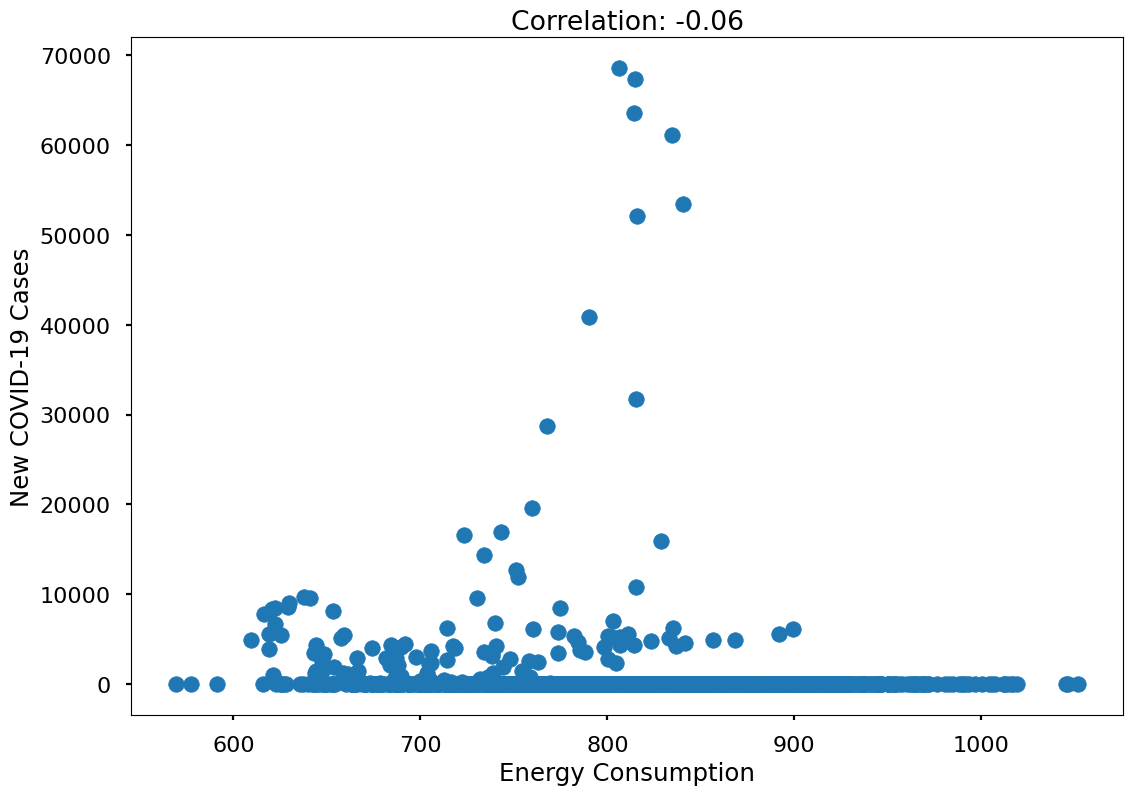

Correlation between new confirmed COVID-19 cases reported to WHO and energy consumption: -0.06


In [42]:
# Merge the two datasets
merged_data = pd.merge(mean_lv_flat, cases_lv_df, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['New_cases'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['New_cases'])
plt.xlabel('Energy Consumption')
plt.ylabel('New COVID-19 Cases')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between new confirmed COVID-19 cases reported to WHO and energy consumption: {correlation:.2f}')

A correlation coefficient of -0.06 indicates a very weak negative linear relationship between new confirmed COVID-19 cases reported to WHO and energy consumption. 

### Lithuania

In [43]:
energy_lt = pd.read_csv("df_energy_consumption_lt.csv")

# Convert 'Period' column to datetime type
energy_lt['Period'] = pd.to_datetime(energy_lt['Period'])
# Extract year, month and day information
energy_lt['Year'] = energy_lt['Period'].dt.year
energy_lt['Month'] = energy_lt['Period'].dt.month
energy_lt['Day'] = energy_lt['Period'].dt.day

mean_lt = energy_lt.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
mean_lt_flat = mean_lt.reset_index()
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month', 'Day']].assign(DAY=1))

# Remove 'Year', 'Month', 'Day' columns from mean_lt_flat dataset and convert them to pandas datetime in "Date" column
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month', 'Day']])
mean_lt_flat = mean_lt_flat.drop(['Year', 'Month', 'Day'], axis=1)

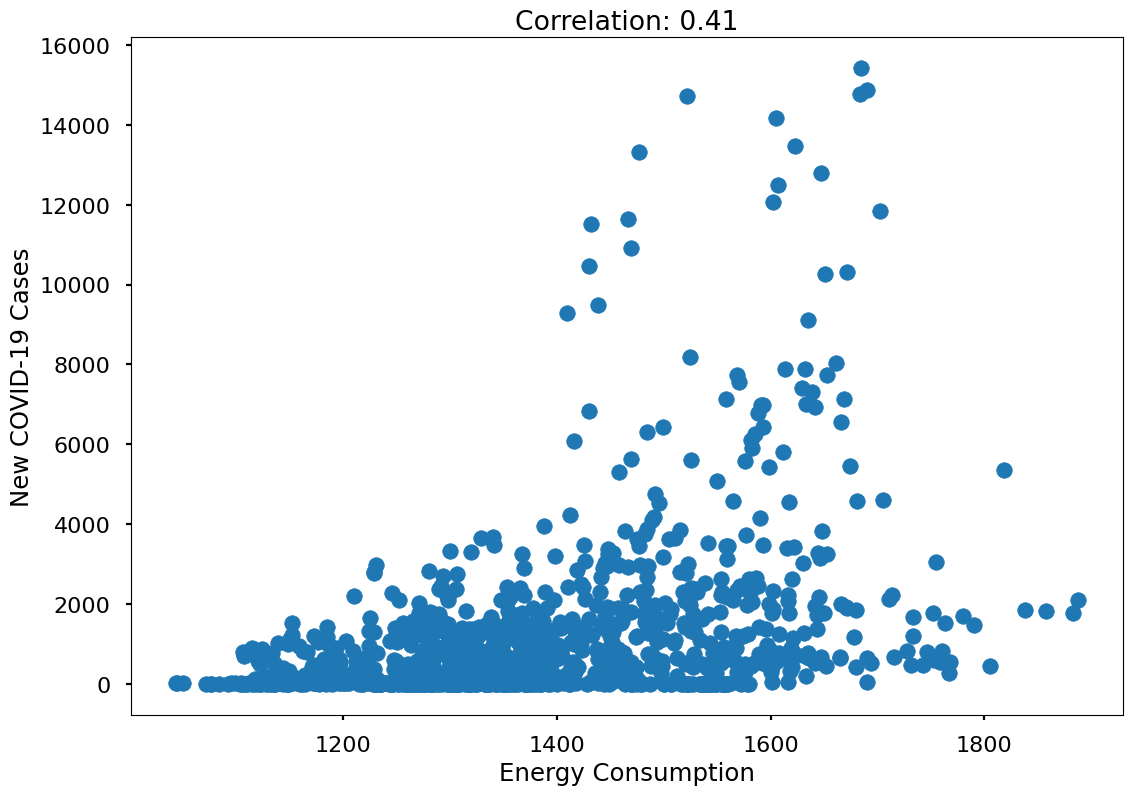

Correlation between new confirmed COVID-19 cases reported to WHO and energy consumption: 0.41


In [44]:
# Merge the two datasets
merged_data = pd.merge(mean_lt_flat, cases_lt_df, on='Date', how='inner')

# Calculate the correlation
correlation = merged_data['Consumption'].corr(merged_data['New_cases'])

# Plotting
plt.scatter(merged_data['Consumption'], merged_data['New_cases'])
plt.xlabel('Energy Consumption')
plt.ylabel('New COVID-19 Cases')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

print(f'Correlation between new confirmed COVID-19 cases reported to WHO and energy consumption: {correlation:.2f}')

A correlation coefficient of 0.41 indicates a moderate positive linear relationship between new confirmed COVID-19 cases reported to WHO and energy consumption. 